In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\md kaif\\Downloads\\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
for i in df.columns:
    print(i,"=-=-=-=-=-=-=-",df[i].unique())

Pregnancies =-=-=-=-=-=-=- [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose =-=-=-=-=-=-=- [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure =-=-=-=-=-=-=- [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness =-=-=-=-=-=-=- [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22

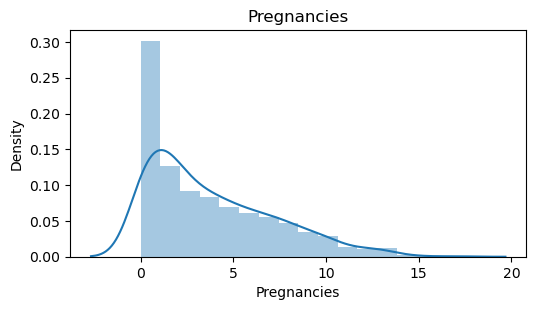

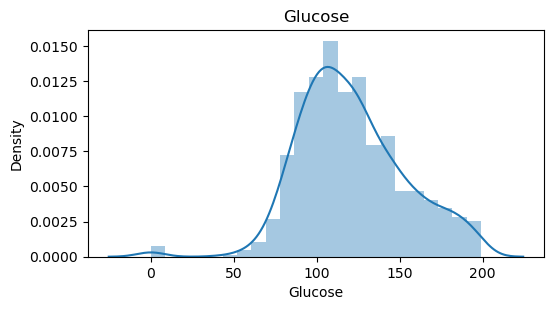

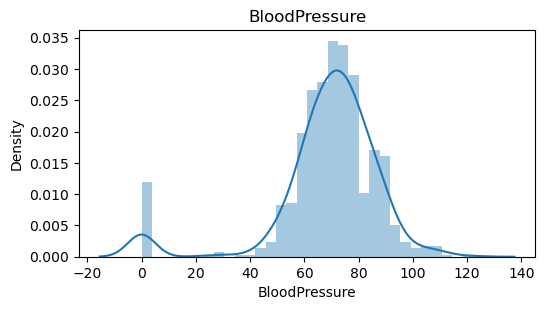

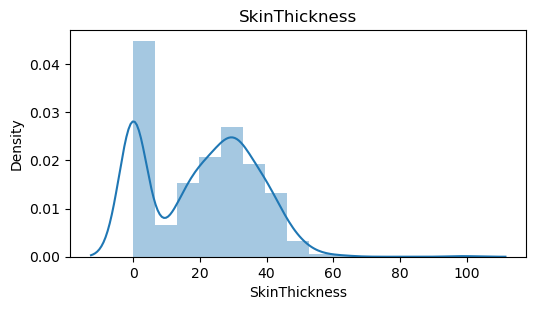

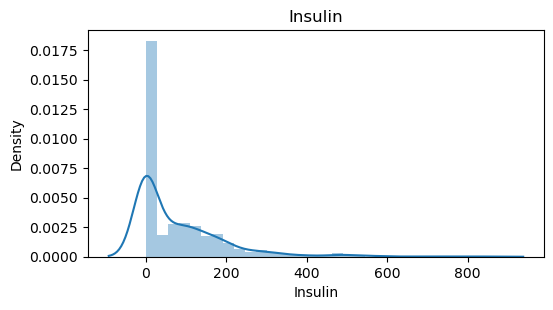

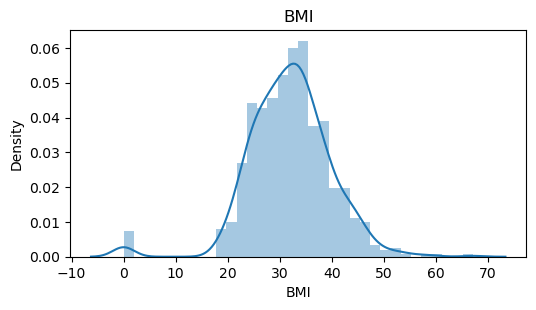

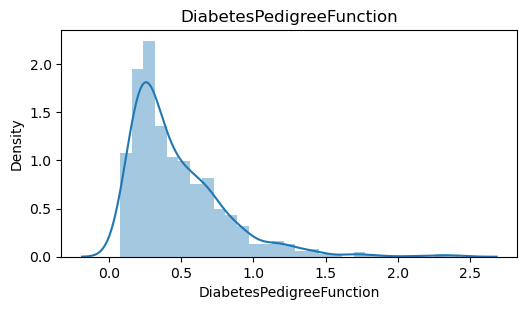

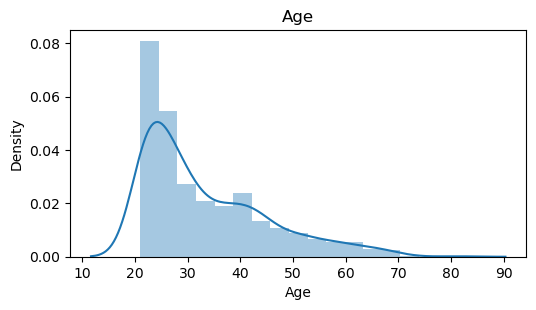

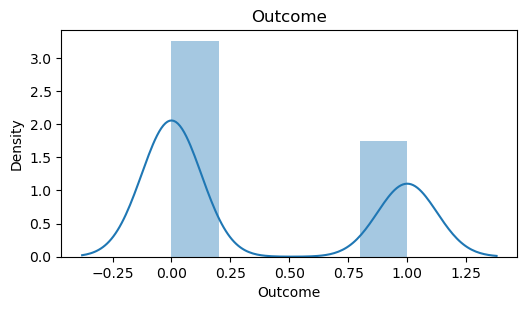

In [8]:
pos=1
for i in df.columns:
    plt.figure(figsize=(20,10))
    plt.subplot(3,3,pos)
    sns.distplot(df[i])
    plt.title(i)
    pos+=1

In [9]:
# replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

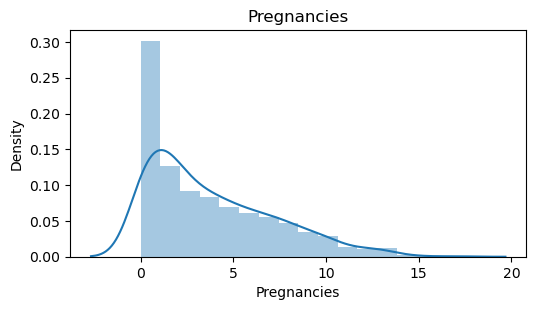

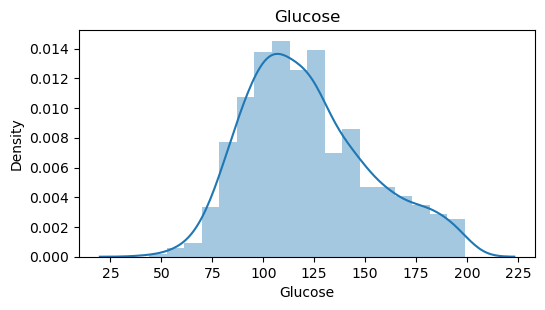

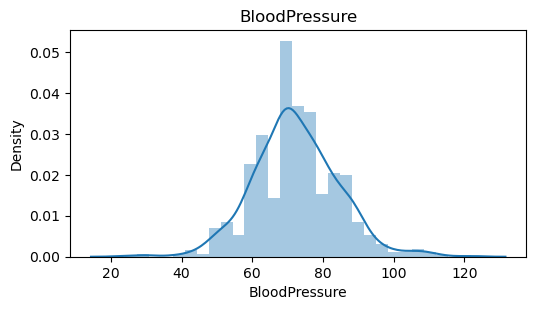

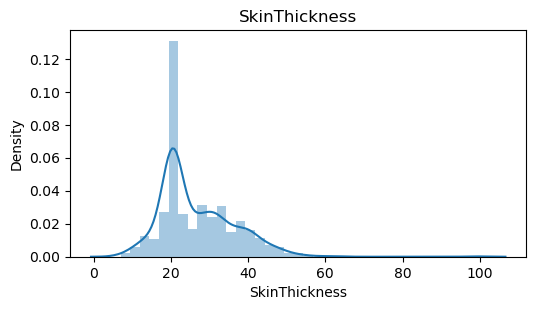

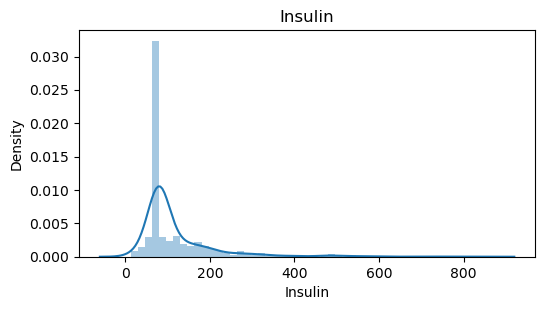

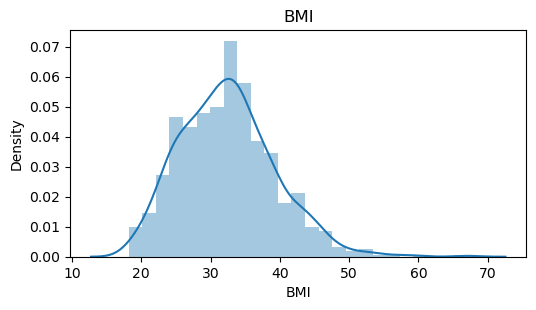

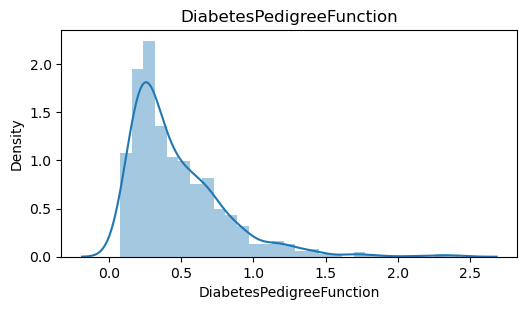

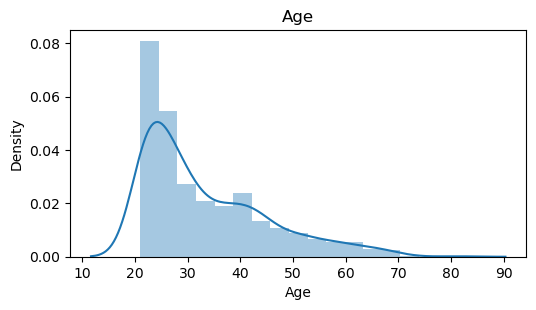

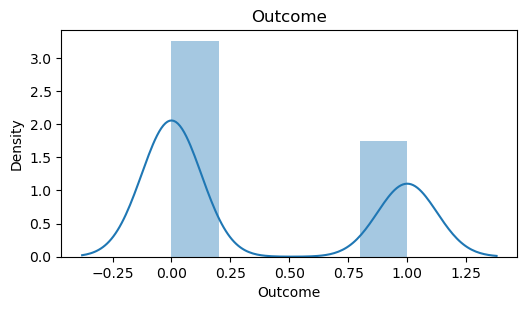

In [10]:
pos=1
for i in df.columns:
    plt.figure(figsize=(20,10))
    plt.subplot(3,3,pos)
    sns.distplot(df[i])
    plt.title(i)
    pos+=1

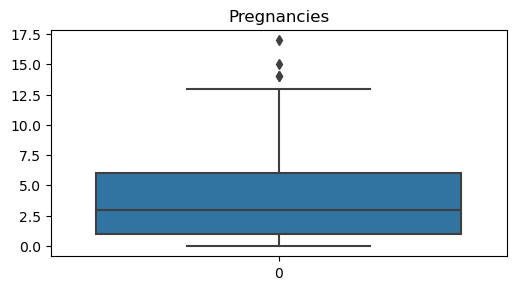

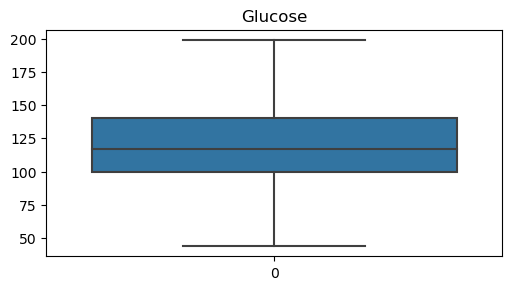

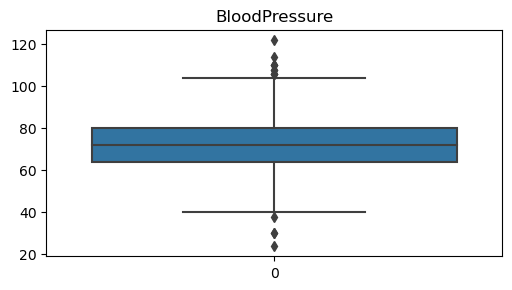

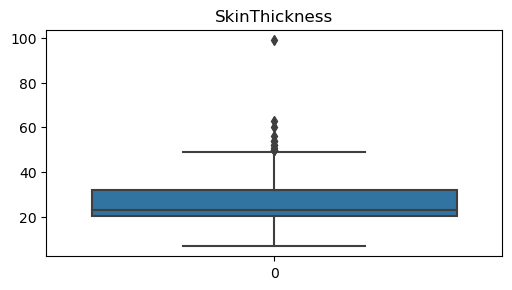

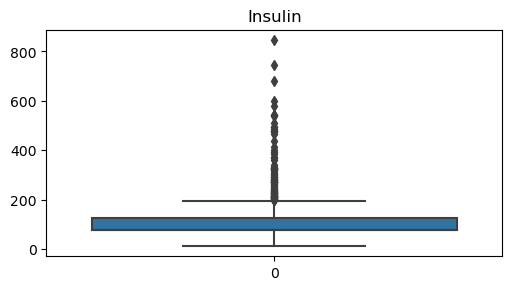

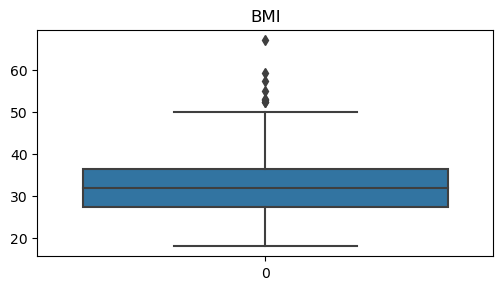

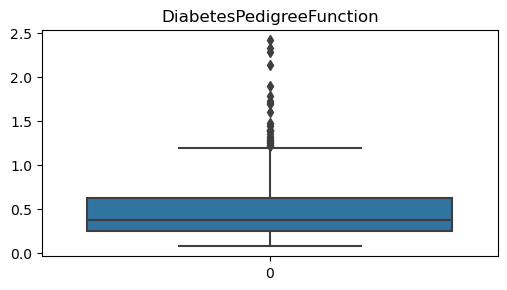

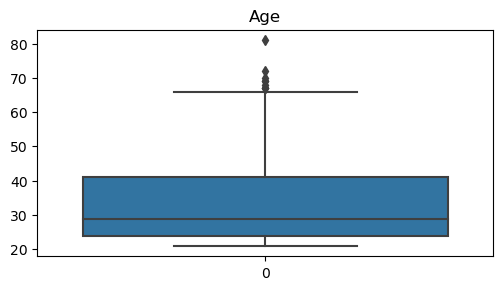

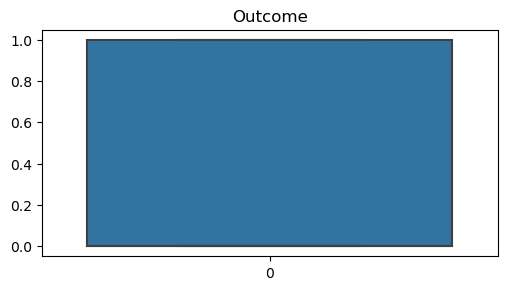

In [11]:
pos=1
for i in df.columns:
    plt.figure(figsize=(20,10))
    plt.subplot(3,3,pos)
    sns.boxplot(df[i])
    plt.title(i)
    pos+=1

In [12]:
df1=df.copy()

In [13]:
for i in df1.columns:
    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df1[i] = np.where(df1[i] > upper_limit, upper_limit, np.where(df1[i] < lower_limit, lower_limit,
                                                       df1[i])) # for middle part of box which can be 



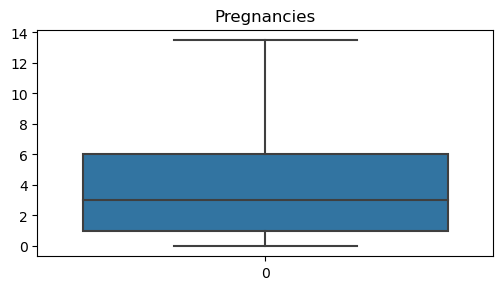

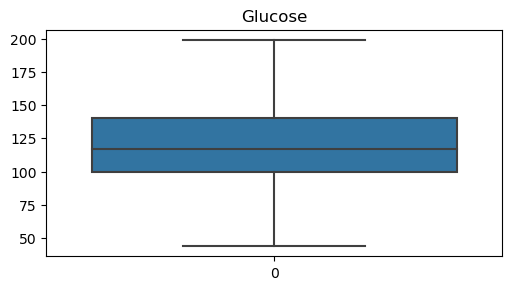

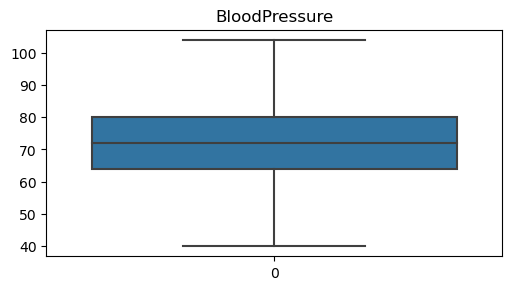

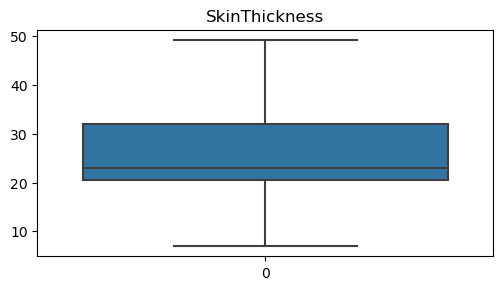

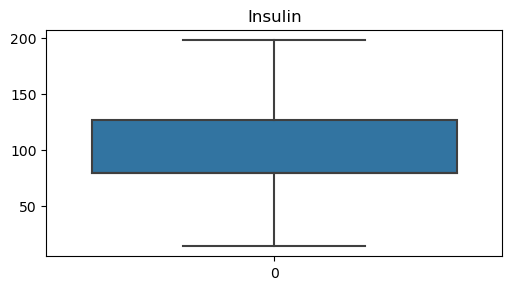

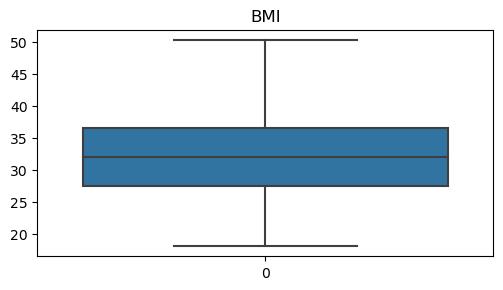

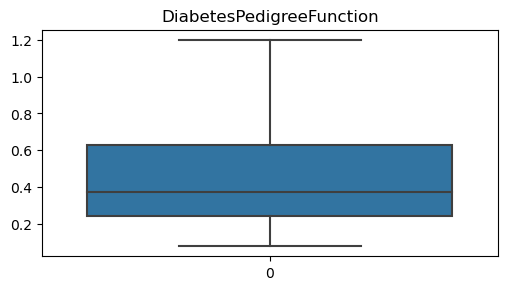

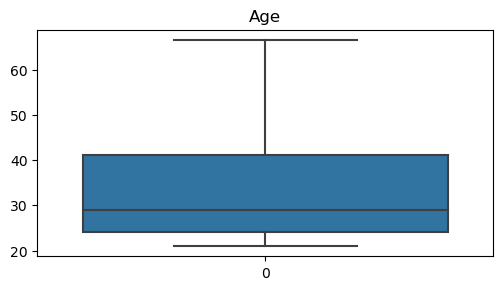

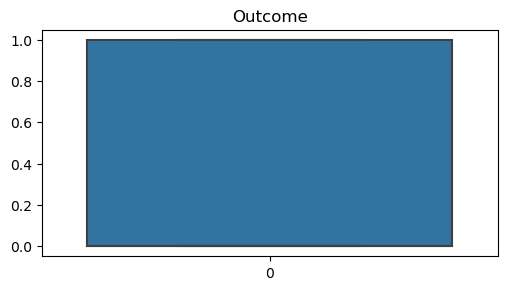

In [14]:
pos=1
for i in df1.columns:
    plt.figure(figsize=(20,10))
    plt.subplot(3,3,pos)
    sns.boxplot(df1[i])
    plt.title(i)
    pos+=1

In [15]:
x=df1.drop(columns=["Outcome"])
y=df1["Outcome"]

In [16]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [19]:
## Training The Model

In [20]:
knn=KNeighborsClassifier()

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
## Evaluating The Model

In [23]:
y_pred=knn.predict(x_test)

In [24]:
#Accuracy On Test

In [25]:
accuracy_score(y_test,y_pred)

0.6979166666666666

In [26]:
##Accuracy On TRaining

In [27]:
y_pred_train=knn.predict(x_train)

In [28]:
accuracy_score(y_train,y_pred_train)

0.8402777777777778

In [33]:
l=[1,3,5,7,9,11,13,15,17,19,21,23]
acc_test=[]
acc_train=[]
for i in l:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    y_pred_train=knn.predict(x_train)
    acc_test.append(accuracy_score(y_test,y_pred))
    acc_train.append(accuracy_score(y_train,y_pred_train))
print("Accuracy On Test","---","---",acc_test)
print("Accuracy On Train","---","-----",acc_train) 

Accuracy On Test --- --- [0.6510416666666666, 0.6822916666666666, 0.6979166666666666, 0.7239583333333334, 0.7291666666666666, 0.7447916666666666, 0.7395833333333334, 0.75, 0.75, 0.734375, 0.75, 0.75]
Accuracy On Train --- ----- [1.0, 0.8489583333333334, 0.8402777777777778, 0.8385416666666666, 0.8090277777777778, 0.7986111111111112, 0.8072916666666666, 0.8038194444444444, 0.8177083333333334, 0.8038194444444444, 0.8055555555555556, 0.8055555555555556]


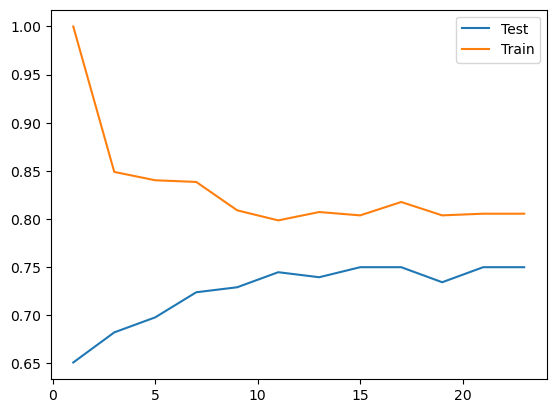

In [30]:
plt.plot(l,acc_test,label="Test")
plt.plot(l,acc_train,label="Train")
plt.legend()